# IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Tensorflow
import tensorflow as tf

In [ ]:
import pandas as pd
imdb = pd.read_csv('IMDB Dataset.csv')
imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
# dataframe information
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# check for null values
imdb.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# Find the number of unique values in a particular column
imdb['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

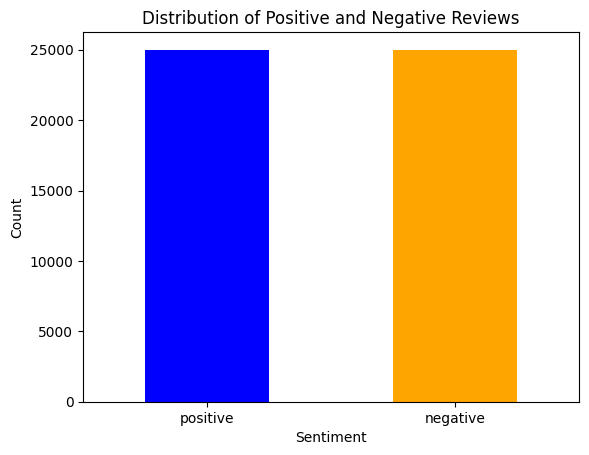

In [ ]:
imdb['sentiment'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# PERFORM DATA CLEANING (REMOVE PUNCTUATIONS,LINK,EMOJIS FROM TEXT)

In [ ]:
import re
import string

def clean_text(text):
    # Remove links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text




In [ ]:
imdb['review'] = imdb['review'].apply(clean_text)

In [ ]:
imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The filmin...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,Bad plot bad dialogue bad acting idiotic direc...,negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,Im going to have to disagree with the previous...,negative


#  PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [ ]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])

In [ ]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)

    return result

In [ ]:
imdb['review'] = imdb['review'].apply(preprocess)

In [ ]:
imdb

,review,sentiment
0,"[one, reviewers, mentioned, watching, episode,...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, time, money, visually,...",positive
...,...,...
49995,"[thought, movie, right, good, job, wasnt, crea...",positive
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[going, disagree, previous, comment, side, mal...",negative


In [ ]:
# join the words into a string
imdb['review'] = imdb['review'].apply(lambda x: " ".join(x))

In [ ]:
imdb

,review,sentiment
0,one reviewers mentioned watching episode youll...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary schools n...,negative
49998,going disagree previous comment side maltin on...,negative


#Text Embeddings using hugging face Transformers

In [ ]:
# Split the dataset into training and testing sets
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Initialize the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

# Function to get embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Get embeddings for all preprocessed reviews
imdb['embeddings'] = imdb['review'].apply(get_embeddings)

# Convert embeddings to a list of numpy arrays
X = np.array(imdb['embeddings'].tolist())
y = imdb['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple classifier
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8225

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4961
           1       0.82      0.83      0.83      5039

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



#  TF-IDF and Machine Learning Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

# 1. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(imdb['review'], imdb['sentiment'], test_size=0.2, random_state=42)

# 2. TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 3. ML Models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': LinearSVC(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"Training {name} :")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model}")
print(f"Best Accuracy: {results[best_model]:.4f}")

Training Naive Bayes :
Naive Bayes Accuracy: 0.8522
Training Logistic Regression :
Logistic Regression Accuracy: 0.8872
Training SVM :


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Accuracy: 0.8812

Best Model: Logistic Regression
Best Accuracy: 0.8872


#Neural Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(imdb['review'], imdb['sentiment'], test_size=0.2, random_state=42)

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_tfidf.toarray())
X_test_tensor = torch.FloatTensor(X_test_tfidf.toarray())
y_train_tensor = torch.LongTensor(y_train.map({'positive': 1, 'negative': 0}).values)
y_test_tensor = torch.LongTensor(y_test.map({'positive': 1, 'negative': 0}).values)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the neural network
class FeedForwardNN(nn.Module):
    def __init__(self, input_dim):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 2)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Initialize the model
input_dim = X_train_tensor.shape[1]
model = FeedForwardNN(input_dim)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        train_correct = 0
        test_correct = 0
        train_total = 0
        test_total = 0

        for batch_X, batch_y in train_loader:
            outputs = model(batch_X)
            _, predicted = torch.max(outputs.data, 1)
            train_total += batch_y.size(0)
            train_correct += (predicted == batch_y).sum().item()

        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            _, predicted = torch.max(outputs.data, 1)
            test_total += batch_y.size(0)
            test_correct += (predicted == batch_y).sum().item()

        train_accuracy = train_correct / train_total
        test_accuracy = test_correct / test_total

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Final evaluation
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, test_predicted = torch.max(test_outputs.data, 1)
    final_test_accuracy = accuracy_score(y_test_tensor, test_predicted)

print(f'\nFinal Test Accuracy: {final_test_accuracy:.4f}')

Epoch [1/10], Train Accuracy: 0.9248, Test Accuracy: 0.8841
Epoch [2/10], Train Accuracy: 0.9410, Test Accuracy: 0.8825
Epoch [3/10], Train Accuracy: 0.9664, Test Accuracy: 0.8838
Epoch [4/10], Train Accuracy: 0.9876, Test Accuracy: 0.8830
Epoch [5/10], Train Accuracy: 0.9979, Test Accuracy: 0.8777
Epoch [6/10], Train Accuracy: 0.9998, Test Accuracy: 0.8785
Epoch [7/10], Train Accuracy: 0.9999, Test Accuracy: 0.8764
Epoch [8/10], Train Accuracy: 0.9993, Test Accuracy: 0.8785
Epoch [9/10], Train Accuracy: 0.9997, Test Accuracy: 0.8756
Epoch [10/10], Train Accuracy: 0.9998, Test Accuracy: 0.8785

Final Test Accuracy: 0.8785
